In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Given excel file
df= pd.read_excel("A12-glass.xlsx")
df

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [3]:
df = pd.read_excel("A12-glass.xlsx", sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Check missing values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
# Class distribution
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [ ]:
"""

1 -- building_windows_float_processed
2 --building_windows_non_float_processed
3 --vehicle_windows_float_processed
4 --vehicle_windows_non_float_processed
5 --containers
6 --tableware
7 --headlamps

"""


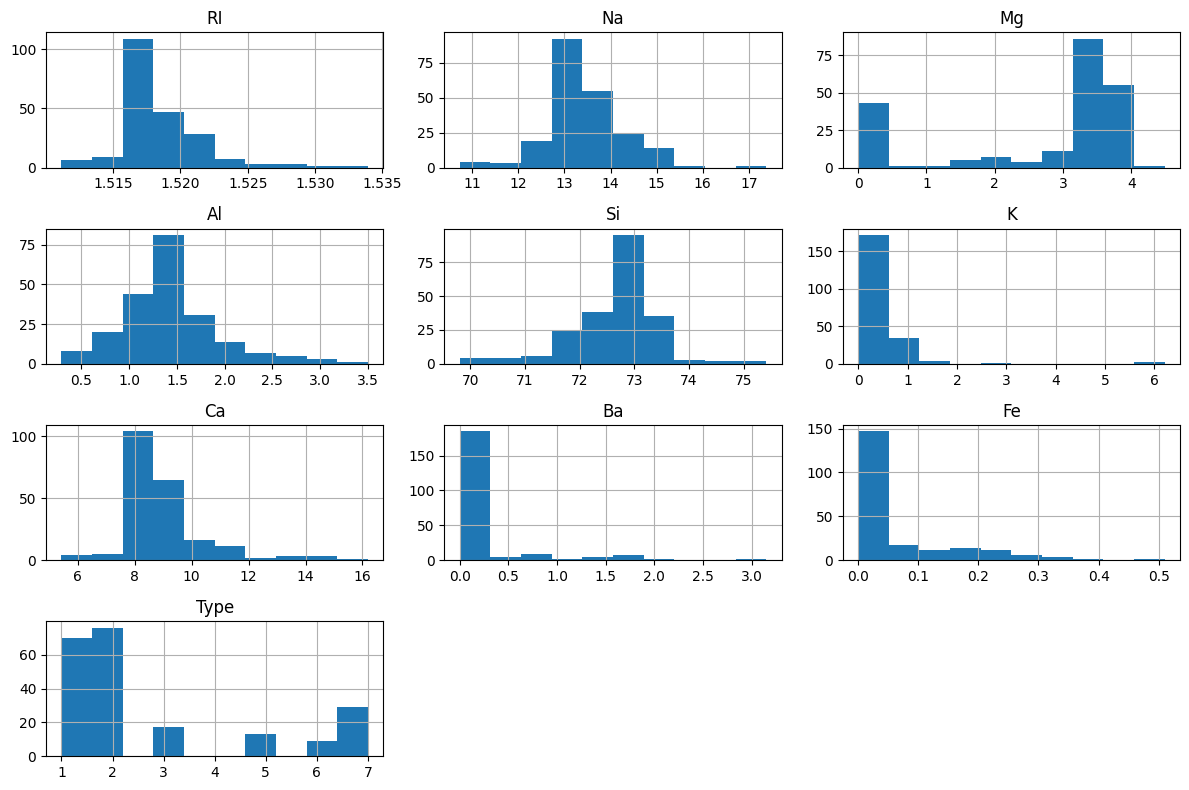

'\nfor col in df.columns:\n    plt.hist(df[col])  \n    plt.title(f"Histogram of {col}")\n    plt.grid()\n    plt.show()\n\n'

In [9]:
# Histograms

df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

"""
for col in df.columns:
    plt.hist(df[col])  
    plt.title(f"Histogram of {col}")
    plt.grid()
    plt.show()

"""

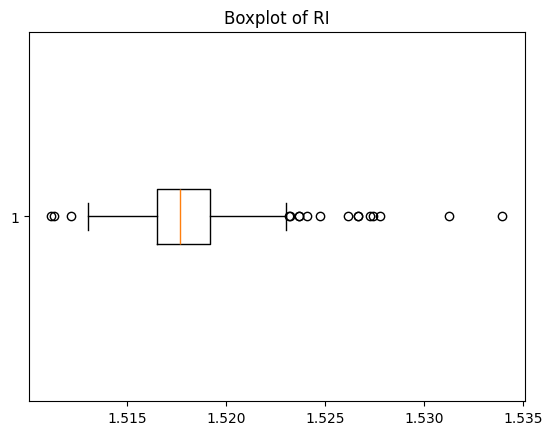

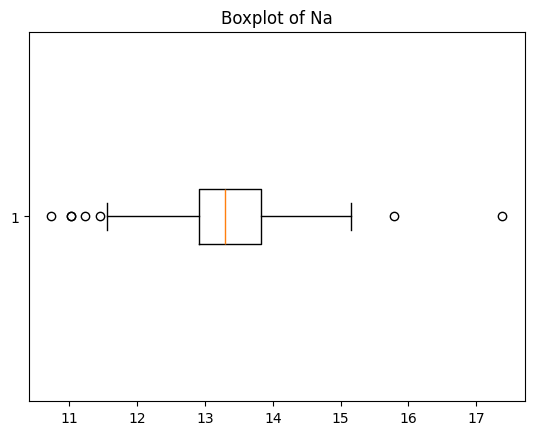

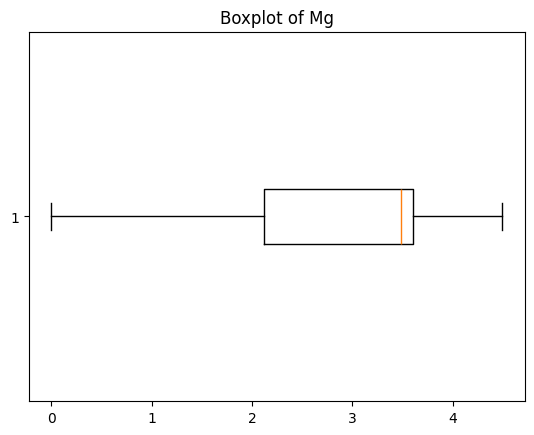

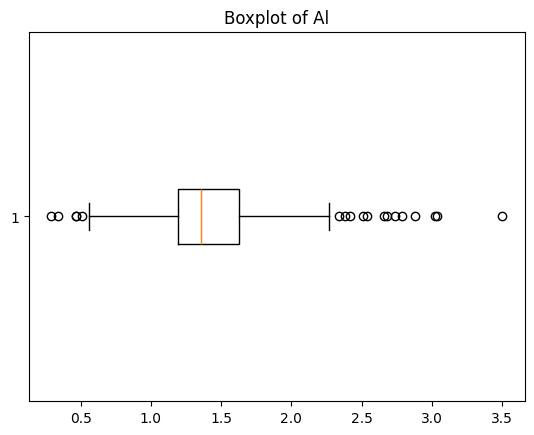

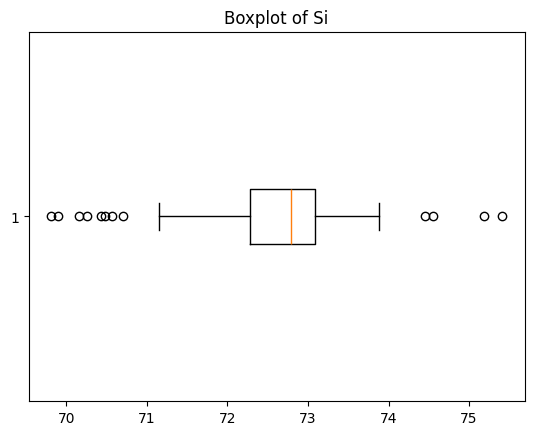

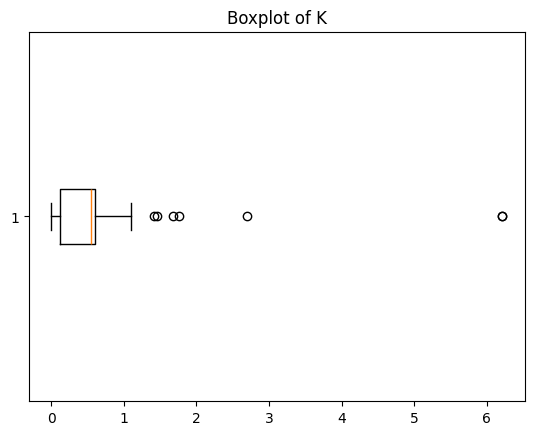

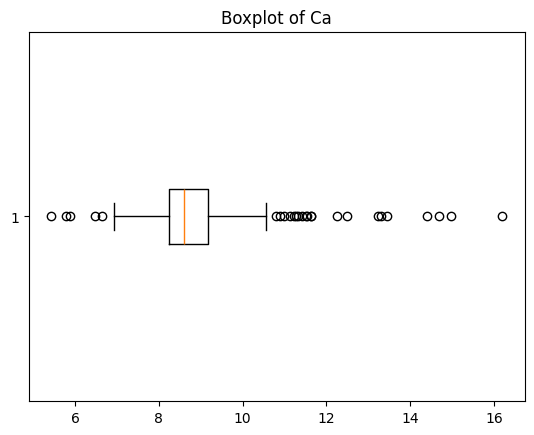

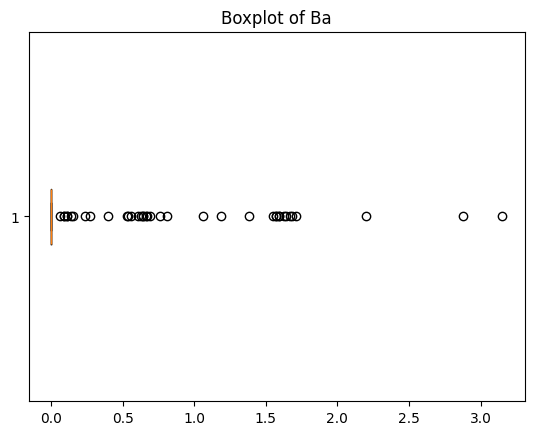

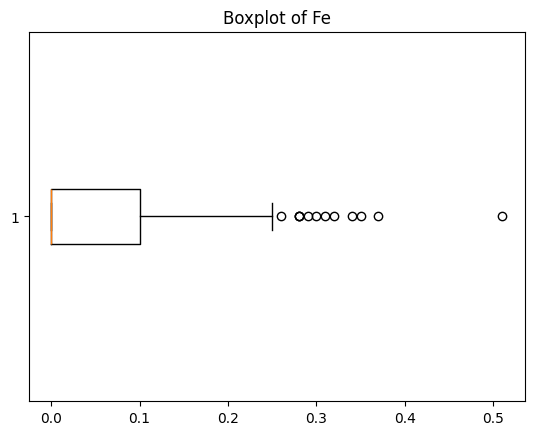

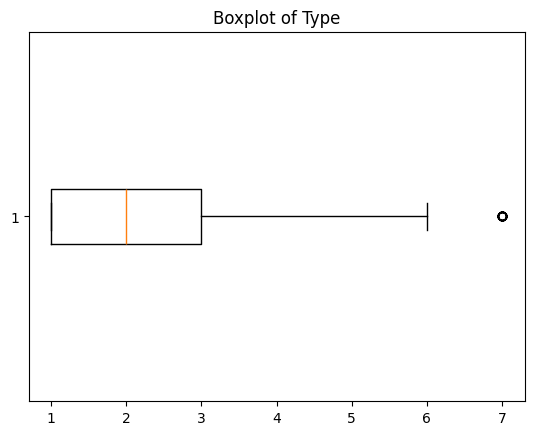

In [10]:
# Boxplots
for col in df.columns:
    plt.boxplot(df[col],vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()

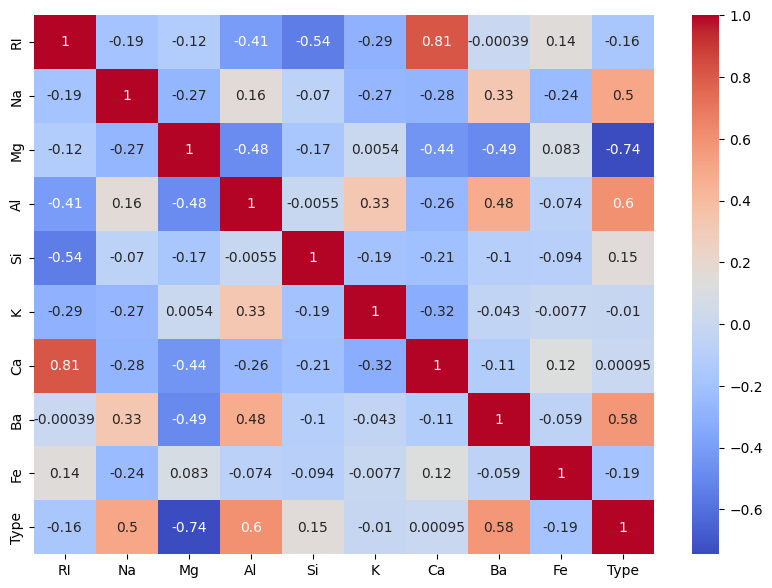

In [11]:
# Correlation heatmap
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [12]:
df.corr()['Type'].abs().sort_values(ascending=False)


Type    1.000000
Mg      0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe      0.188278
RI      0.164237
Si      0.151565
K       0.010054
Ca      0.000952
Name: Type, dtype: float64

<Axes: >

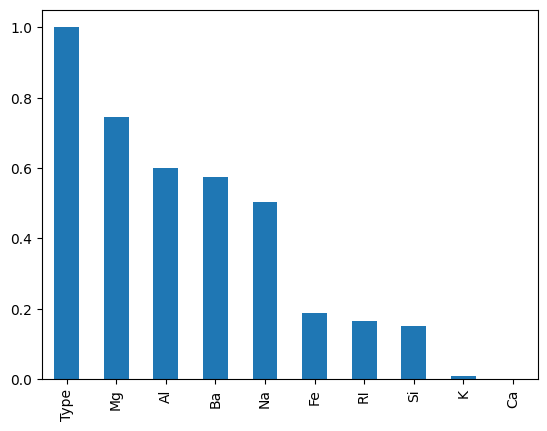

In [13]:
df.corr()['Type'].abs().sort_values(ascending=False).plot(kind='bar')

In [14]:
x = df.drop("Type", axis=1)
y = df["Type"]

# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler();
x = ss.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42, class_weight="balanced")
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

print("Trianing Accuracy:", np.round(accuracy_score(y_train,y_pred_train), 3))
print("Test Accuracy:", np.round(accuracy_score(y_test,y_pred_test), 3))
print("\n Trianing classification report:\n", classification_report(y_train,y_pred_train))
print("\n Test classification report:\n", classification_report(y_test,y_pred_test))

Trianing Accuracy: 1.0
Test Accuracy: 0.744

 Trianing classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        23

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


 Test classification report:
               precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.73      0.73      0.73        15
           3       0.50      0.33      0.40         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.0

In [17]:
#Hyperparameter Tuning for Random Forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42,class_weight="balanced"), 
                    param_grid,
                    cv=5, 
                    scoring='accuracy')
grid.fit(x_train, y_train)  

print("\nBest params:", grid.best_params_)



Best params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [18]:
# based on best estimators/parameters
best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(x_test)

print("\nTest Accuracy After Tuning:", round(accuracy_score(y_test, y_pred_best), 3))
print("\nClassification report (tuned):\n", classification_report(y_test, y_pred_best))



Test Accuracy After Tuning: 0.814

Classification report (tuned):
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.79      0.73      0.76        15
           3       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.81        43
   macro avg       0.87      0.85      0.84        43
weighted avg       0.83      0.81      0.81        43



In [ ]:
# Model Performance Before vs After Tuning
# Before Tuning                            # After Tuning
# Test Accuracy: 0.744                     # 0.814

Mg    0.175136
Ca    0.144854
Na    0.129729
K     0.128561
Al    0.128036
RI    0.104956
Si    0.086328
Ba    0.082356
Fe    0.020045
dtype: float64


<Axes: >

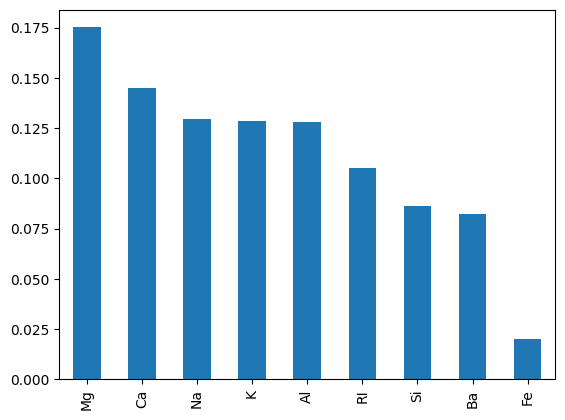

In [19]:
#Which features are most important
imp_fea = pd.Series(best_rf.feature_importances_, index=df.drop("Type", axis=1).columns).sort_values(ascending=False)
print(imp_fea)
imp_fea.plot(kind='bar')

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

bag_params = {
    "n_estimators": [50, 100, 200],
    "max_samples": [0.6, 0.8, 1.0],
    "max_features": [0.6, 0.8, 1.0],
}

bag_model = BaggingClassifier(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    random_state=42
)

grid_bag = GridSearchCV(bag_model, bag_params, cv=5, scoring='accuracy')
grid_bag.fit(x_train, y_train)

print("\nBest Params (Bagging):", grid_bag.best_params_)

best_bag = grid_bag.best_estimator_
y_bag_pred = best_bag.predict(x_test)

print("\nBagging Test Accuracy:", round(accuracy_score(y_test, y_bag_pred), 3))
print("\nBagging Classification Report:\n", classification_report(y_test, y_bag_pred))



Best Params (Bagging): {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}

Bagging Test Accuracy: 0.791

Bagging Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.79      0.73      0.76        15
           3       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.79        43
   macro avg       0.86      0.79      0.79        43
weighted avg       0.81      0.79      0.79        43



In [ ]:
#Bagging (Bootstrap Aggregating) trains multiple models on different random subsets of the data and averages their predictions.
#It reduces variance and prevents overfitting.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

boost_params = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.5, 0.8, 1.0],
    "algorithm": ["SAMME", "SAMME.R"]
}

boost_model = AdaBoostClassifier(random_state=42)

grid_boost = GridSearchCV(boost_model, boost_params, cv=5, scoring='accuracy')
grid_boost.fit(x_train, y_train)

print("\nBest Params (Boosting):", grid_boost.best_params_)

best_boost = grid_boost.best_estimator_
y_boost_pred = best_boost.predict(x_test)

print("\nBoosting Test Accuracy:", round(accuracy_score(y_test, y_boost_pred), 3))
print("\nBoosting Classification Report:\n", classification_report(y_test, y_boost_pred))


In [ ]:
#Boosting trains models one after another, where each model focuses on correcting previous errors.
#It reduces bias and makes strong learners from weak ones.

In [ ]:
"""
# Final Outcome from Model Comparison

Best Params (Bagging): {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 200}
Bagging Test Accuracy: 0.791


Best Params (Boosting): {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}
Boosting Test Accuracy: 0.512

"""

#Conclusion
#Bagging provided the highest accuracy of 79.1% 
#and showed strong classification results across most glass types.
#Therefore, it is selected as the final model for this Glass Classification project.

    

In [21]:
"""
1. Explain Bagging and Boosting Methods. How are they different?
    #Bagging (Bootstrap Aggregating)
        Bagging is an ensemble technique where multiple models are trained independently in parallel using different random subsets of the data (bootstrapped samples).
        The final prediction is made by averaging (regression) or majority voting (classification).
        It mainly helps in reducing variance and preventing overfitting.
    #Boosting
        Boosting trains models sequentially, where each new model focuses on correcting the mistakes of the previous one.
        All models work together to build a strong predictor from weak learners.
        Boosting mainly helps in reducing bias and improving model accuracy.

    
         Bagging                                             Boosting                                                        
     --------------------------------------------------  --------------------------------------------------------------- 
     Models are trained **independently & in parallel    Models are trained **sequentially & depend on previous models** 
     Reduces **variance**                                Reduces **bias**                                                
     More stable, less sensitive to noise                More sensitive to outliers & noise                              
     Good for overfitting datasets                       Good for underfitting datasets                                  
     Example: Random Forest                              Example: XGBoost                                                


2. Explain how to handle imbalance in the data.
We handle imbalance using oversampling (like SMOTE), undersampling, class weights, and better metrics like F1-score and recall.
Algorithms like Random Forest and XGBoost also support imbalance handling

"""

'\n1. Explain Bagging and Boosting Methods. How are they different?\n\n'